In [1]:
import numpy as np
import string
import matplotlib as mpl
import pandas as pd
import sklearn.manifold as skmf

data=pd.read_csv("AI Classification Data Formatted.csv", header=0)#load student written SOAP notes
abbrevdata=pd.read_csv("Acronyms and Abbreviations.csv", header=0)#load approved acronyms and abbreviations

abbrevdata=abbrevdata.iloc[:,[0,1]] #include only abbreviation and meaning
abbrevdata['Abbreviation']=abbrevdata['Abbreviation'].str.lower()#de-capitalize all text data

#mydata= mydata[data['Question Text'].isin(['SUBJECTIVE','OBJECTIVE'])] #only Subjective and Objective part of SOAP note 
#mydata= mydata.iloc[:,[6,7,8,11,12]]#display only relevant columns
df=data #create copy of dataframe in case standardization distorts results
data

,Organization Unit,ID,Case/Scenario Name,NYHA Classification,Assessment,Classification,HPI
0,Auburn,Student.177,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,0,Pt states that 3 days ago she went to her fami...
1,Auburn,Student.178,Acute Viral Myocarditis I51.4,NYHA II,1,0,The patient is a 62 y/o male who presents to t...
2,Auburn,Student.179,Acute Viral Myocarditis I51.4,NYHA II,1,1,"CC: Patient presents with shortness of breath,..."
3,Auburn,Student.180,Sarcoidosis R. Cardiomyopathy I42.5,NYHA III,1,0,CC:I am short of breath when I walk around.\n\...
4,Auburn,Student.181,Acute Viral Myocarditis I51.4,NYHA II,1,1,CC: The patient is short of breath and fatigue...
...,...,...,...,...,...,...,...
644,Virginia,Student.95,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,"CC - L Palmer 62 presented with ""i feel like ..."
645,Virginia,Student.96,Fam. Hypertrophic Cardiomyopathy I42.2,NYHA II,1,1,Mr. Palmer present todays with SOB 2 weeks ago...
646,Virginia,Student.97,Ischemic Cardiomyopathy I25.2,NYHA IV,1,1,62 year old male Mr. Palmer comes into the off...
647,Virginia,Student.98,Sarcoidosis R. Cardiomyopathy I42.5,NYHA III,1,1,A 62 year old female presents to the office wi...


In [2]:
def remove_punctuations(text): #function to remove punctuation and replace with blank space
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

# Apply standardization to the abbreviation data 
abbrevdata['Abbreviation']=abbrevdata['Abbreviation'].apply(remove_punctuations)
abbrevdata['Meaning']=abbrevdata['Meaning'].apply(remove_punctuations)
abbrevdata['Abbreviation']=abbrevdata['Abbreviation'].str.lower()
abbrevdata['Meaning']=abbrevdata['Meaning'].str.lower()
print(abbrevdata['Abbreviation'])
print(abbrevdata['Meaning'])
# Apply standardization to the abbreviation data 
data['HPI'] = data['HPI'].str.lower()
data['HPI'] = data['HPI'].apply(remove_punctuations)
data['HPI'] = data['HPI'].str.replace('\n', ' ')
  
for a,b in zip(abbrevdata.Meaning, abbrevdata.Abbreviation): #function to map medical terms to abbreviations
    data['HPI'] = data['HPI'].str.replace(a,b)

data['HPI']

0         neg
1            
2         pos
3            
4      5 hiaa
        ...  
214         w
215       wbc
216       wnl
217        xr
218        yo
Name: Abbreviation, Length: 219, dtype: object
0                        negative
1                        negative
2                        positive
3                        positive
4      5 hydroxyindoleacetic acid
                  ...            
214                         white
215             white blood cells
216          within normal limits
217                         x ray
218                      year old
Name: Meaning, Length: 219, dtype: object


0      pt states that 3 days ago she went to her fami...
1      the patient is a 62 y o m who presents to the ...
2      cc  patient presents with sob  chest pain  and...
3      cc i am short of breath when i walk around   h...
4      cc  the patient is short of breath and fatigue...
                             ...                        
644    cc   l palmer 62 presented with   i feel like ...
645    mr  palmer present todays with sob 2 weeks ago...
646    62 yo m mr  palmer comes into the office c o s...
647    a 62 yo f presents to the office with sob and ...
648    cc   sob and fatigue   mrs  palmer  a 62 yo f ...
Name: HPI, Length: 649, dtype: object

In [3]:
import nltk
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#remove common words from data
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')
print(stop)
data['HPI'] =data['HPI'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['HPI']

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'other', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will

0      pt states 3 days ago went family doctor sob fe...
1      patient 62 presents cardiology office evaluati...
2      cc patient presents sob chest pain peripheral ...
3      cc short breath walk around hpi leslie palmer ...
4      cc patient short breath fatigued hpi patient 6...
                             ...                        
644    cc l palmer 62 presented feel like going pass ...
645    mr palmer present todays sob 2 weeks ago walki...
646    62 yo mr palmer comes office c sob fatigue hap...
647    62 yo f presents office sob fatigue onset bega...
648    cc sob fatigue mrs palmer 62 yo f came see goi...
Name: HPI, Length: 649, dtype: object

In [4]:
key=pd.read_csv("keywords.csv",header=0) #load keywords and give dummy headers

key=key.replace(np.nan, '', regex=True)#replace NaN with blank
key=key.replace('\n',' ',regex=True)#replace \n with blank
key=key.astype(str)#convert all key to string in case

key['keywords'] = key['keywords'].str.lower()
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')
key['keywords'] =key['keywords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
key['keywords'] = key['keywords'].apply(remove_punctuations)
print(key.iloc[0,0])
#replace medical terms with abbreviations
for a,b in zip(abbrevdata.Meaning, abbrevdata.Abbreviation): 
    key['keywords'] = key['keywords'].str.replace(a,b)
key

no sob


,keywords,NYHA II Acute,NYHA II Fam,NYHA III,NYHA IV
0,no sob,no sob,no sob,no sob,
1,no shortness breath,no shortness of breath,no shortness of breath,no shortness of breath,
2,sob,sob,sob,sob,sob
3,shortness breath,shortness of breath,shortness of breath,shortness of breath,shortness of breath
4,dyspnea,dyspnea,dyspnea,dyspnea,dyspnea
...,...,...,...,...,...
60,unable,,,,unable
61,discomfort,,,,discomfort
62,breathlessness,breathlessness,breathlessness,breathlessness,
63,increased,,,,increased


In [5]:
import matplotlib.pyplot as plt

import string 
import seaborn
u=data.HPI.aggregate(''.join)
u=u.apply(lambda x:
         [e for e in x.split()])
TF=u.apply(lambda bag: pd.Series(bag).value_counts())
IDF=np.log(float(len(TF))/TF.count())
TFIDF=TF*IDF
TFIDF=TFIDF.fillna(0.0)
TFIDF
l=TFIDF.sum()
l=l.sort_values(ascending=False)
print(np.mean(l), np.std(l),len(l))
f=l.iloc[0:50]
e=l.iloc[50:]
#print(f)
#print(l.iloc[700:])
plt.figure(figsize=(20, 20), dpi=80)

#plt.hist(l,data=1 bins=np.arange(l.min(), l.max()+1))
topTerm=pd.DataFrame({'HPI': TFIDF.idxmax(axis=1),'TFIDF':TFIDF.max(axis=1)},columns=['HPI','TFIDF'])
topTerm=topTerm.sort_values(by="TFIDF",ascending=False)
#topTerm
#f
#e
ld = pd.DataFrame(data=l).reset_index()
ld

36.59541611365503 57.62095602113183 1625


,index,0
0,pt,511.451972
1,patient,489.995355
2,states,423.574224
3,pain,378.213984
4,symptoms,375.017107
...,...,...
1620,16,6.475433
1621,lasted,6.475433
1622,partner,6.475433
1623,besides,6.475433


<Figure size 1600x1600 with 0 Axes>

In [6]:
ld[ld['index'] == 'wks']

,index,0
1077,wks,6.475433


In [7]:
df = pd.DataFrame(columns=key['keywords'])

In [8]:
set(key['keywords'])

{'',
 '10 feb',
 '2',
 '2 months',
 '2 weeks',
 '6',
 '6 months',
 'breath',
 'breathlessness',
 'chair',
 'cold',
 'comfortable',
 'comfortable rest',
 'comfortable rest  less ordinary physical activity results undue breathlessness  fatigue  palpitations',
 'comfortable rest  ordinary physical activity results undue breathlessness  fatigue  palpitations',
 'cough',
 'discomfort',
 'dull',
 'dyspnea',
 'fatigue',
 'fever',
 'flutter',
 'gym',
 'increased',
 'marked',
 'marked limitation physical activity',
 'months',
 'most',
 'muscle aches',
 'no shortness breath',
 'no sob',
 'palpitations',
 'pass out',
 'physical activity',
 'physical activity undertaken  discomfort increased',
 'recliner',
 'rest',
 'runny nose',
 'short',
 'short breath',
 'shortness',
 'shortness breath',
 'six',
 'six months',
 'slight',
 'slight limitation physical activity',
 'sob',
 'some',
 'some physical activity',
 'swelling',
 'symptoms rest present',
 'syncope',
 'tired',
 'two',
 'two months',
 'two we

In [9]:
def keycount(word, string):
    count = 0
    if word in string:
         count = count +1
    else:
        count =count+0
    return(count)

In [10]:
for i in ld['index']:
    a=[]
    
    for word in key['keywords']:
      
        count = keycount(word, i)
        a.append(count)
    df.loc[len(df)] = a
    #data[word]=a
df
#data[word]=a
#data
df = df.sum().reset_index()

In [11]:
finalkey = df[df[0] > 0].reset_index()
fk = finalkey.reset_index()

fk = fk.iloc[:, 2]
fk

0                sob
1            dyspnea
2          shortness
3              short
4             breath
5                  2
6              weeks
7                two
8               some
9                   
10              most
11              rest
12       comfortable
13              rest
14      palpitations
15           flutter
16           syncope
17                 6
18               six
19            months
20             chair
21     uncomfortable
22             tired
23           fatigue
24             worse
25         worsening
26              cold
27          wheezing
28             cough
29             fever
30              dull
31               gym
32          recliner
33          swelling
34            slight
35            marked
36            unable
37        discomfort
38    breathlessness
39         increased
40             undue
Name: keywords, dtype: object

In [12]:
writer = pd.ExcelWriter('Student Keywords.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
fk.to_excel(writer, sheet_name='Keywords')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [13]:
unusedkey = df[df[0] == 0].reset_index()
unused = unusedkey.reset_index()

unused = unused.iloc[:, 2]
unused

0                                                no sob
1                                   no shortness breath
2                                      shortness breath
3                                          short breath
4                                             two weeks
5                                               2 weeks
6                                     physical activity
7                                some physical activity
8                                              pass out
9                                            six months
10                                             6 months
11                                             2 months
12                                           two months
13                                           runny nose
14                                               10 feb
15                                         muscle aches
16                  slight limitation physical activity
17    comfortable rest  ordinary physical activi

pt              511.451972
patient         489.995355
states          423.574224
pain            378.213984
symptoms        375.017107
reports         350.145220
chest           336.225850
no              313.168839
worse           303.363032
out             292.233043
like            284.950219
not             277.246469
2               272.343857
exercise        271.096609
also            270.130342
palpitations    267.437104
pass            267.085604
weeks           263.981896
feels           260.472159
breath          258.137567
days            251.436792
activity        248.663867
months          248.401638
palmer          247.927464
heart           247.682088
going           246.757173
past            246.514796
physical        246.162577
feeling         241.057954
office          237.476330
short           236.834838
night           236.190662
cc              235.998981
sleep           234.472259
denies          233.769868
better          233.417239
recliner        233.136491
3

<Figure size 1600x1600 with 0 Axes>

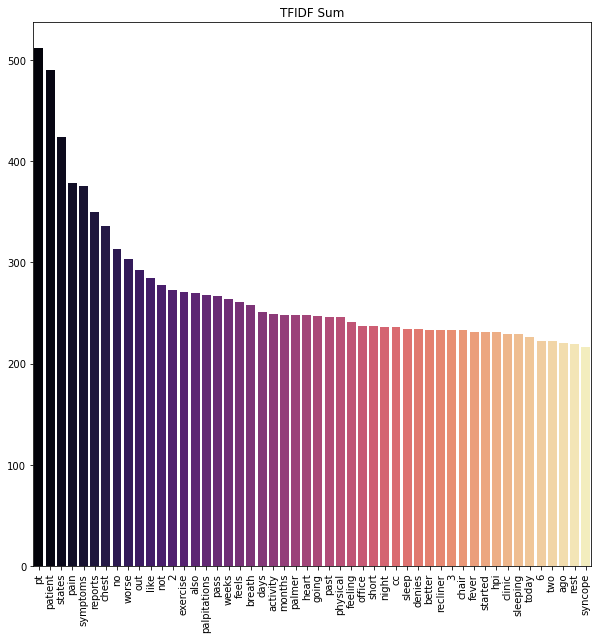

In [14]:
plt.figure(figsize=(20, 20), dpi=80)
#p1 = l.plot(kind='bar', title='Word Frequency for Subjective Portion', yticks=[10, 20, 30,40,50, 60], xlim=50)
#plt.figure()
fig, ax = plt.subplots(figsize=(10,10))
## Setting plot to horizontal for easy viewing + setting title + display 
seaborn.color_palette("flare", as_cmap=True)
#f=l.iloc[0:50]
#e=l.iloc[50:]
print(f)
print(e)
bar_plot = seaborn.barplot(x=f.index, y=f.values, palette='magma',ax=ax)
plt.xticks(rotation=90);
plt.title('TFIDF Sum')
#bar_plot.set_xlim(np.array([0, 0.5])+bar_plot.get_xlim())

plt.show();

In [15]:
topTerm

,HPI,TFIDF
476,sxs,34.693713
550,qday,32.377164
311,q,28.911428
451,mg,23.018252
59,confirmed,19.426298
...,...,...
518,going,3.246805
9,breathe,3.217336
141,worsens,3.041446
360,mr,2.714233


Mean is = 6.744437 
Standard Deviation is = 2.918958 
Max is = 34.693713 
Min is = 2.486449 


C:\Users\tdaniels\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


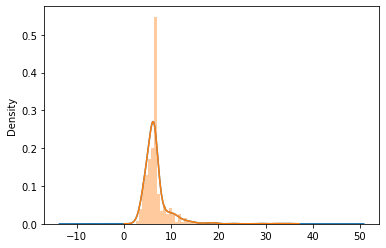

In [16]:
print("Mean is = %f " % np.mean(topTerm['TFIDF']))
print("Standard Deviation is = %f " % np.std(topTerm['TFIDF']))
print("Max is = %f " % np.max(topTerm['TFIDF']))
print("Min is = %f " % np.min(topTerm['TFIDF']))
plt.figure()
u = topTerm['TFIDF'].plot.kde()
u=seaborn.displot(x=topTerm['TFIDF'])


In [17]:
topTerm[topTerm['TFIDF'] > (np.mean(topTerm['TFIDF'])+1.5*np.std(topTerm['TFIDF']))].sort_values(by='TFIDF',ascending=False)

,HPI,TFIDF
476,sxs,34.693713
550,qday,32.377164
311,q,28.911428
451,mg,23.018252
59,confirmed,19.426298
11,pn,19.426298
310,pt,18.385528
631,reported,17.925305
163,ros,17.583965
537,event,16.130461


In [18]:
topTerm[topTerm['TFIDF'] < (np.mean(topTerm['TFIDF'])-np.std(topTerm['TFIDF']))].sort_values(by='TFIDF',ascending=False)

,HPI,TFIDF
293,helps,3.767383
95,feel,3.720624
228,feel,3.720624
347,referral,3.702844
301,exercises,3.702844
42,improves,3.642219
624,most,3.585061
274,most,3.585061
394,month,3.585061
495,undue,3.585061


In [19]:
TF

,sob,states,pt,ago,experiencing,doctor,started,evaluation,fatigued,days,...,names,read,hes,7th,prevented,soreness,todays,explains,disability,produces
0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
646,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
647,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
